In this notebook, we load and analyze the data appearing in the paper "Benchmarking logical three-qubit quantum Fourier transform encoded in the Steane code on a trapped-ion quantum computer."

In [1]:
import numpy as np
import pickle
import os
import json
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from analysis_functions import analyze_T_results, plot_T_data
from analysis_functions import analyze_QFT_results, plot_QFT_data, plot_QFT_comparison_data
from analysis_functions import analyze_TQRB_results, plot_TQRB_data
from analysis_functions import analyze_CT_results, plot_CT_comparison_data

In [2]:
# function for loading data from filename

def load_data(filename):

    current_dir = os.getcwd()
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
    dir_path = os.path.join(parent_dir, 'data')
    file_path = os.path.join(dir_path, filename)

    # Open the JSON file and load its content
    with open(file_path, 'r') as file:
        job_data = json.load(file)
        
    return job_data

### Load, analyze, and plot logical two-qubit randomized benchmarking (TQRB) data

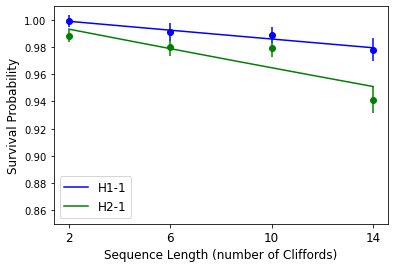

H1-1 Average Fidelity = 0.9991 +/- 0.0002
H2-1 Average Fidelity = 0.998 +/- 0.0008


In [3]:
TQRB_results_H1_1 = load_data('TQRB_H1-1_data.json')
TQRB_results_H2_1 = load_data('TQRB_H2-1_data.json')

TQRB_data1 = analyze_TQRB_results(TQRB_results_H1_1)
TQRB_data2 = analyze_TQRB_results(TQRB_results_H2_1)

plot_TQRB_data(TQRB_data1, TQRB_data2)

### Load, analyze, and plot logical T gate benchmarking data

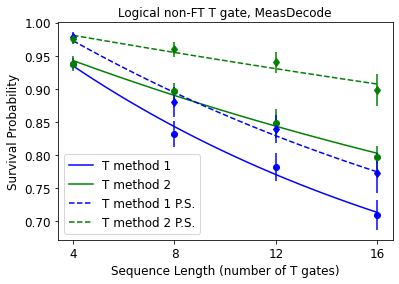

T method 1
Prob of logical Z error: 0.0287 +/- 0.0021
Average Fidelity:        0.9809 +/- 0.0014

T method 2
Prob of logical Z error: 0.0156 +/- 0.0011
Average Fidelity:        0.9896 +/- 0.0007

T method 1
Prob of logical Z error: 0.0221 +/- 0.002
Average Fidelity:        0.9853 +/- 0.0013

T method 2
Prob of logical Z error: 0.0069 +/- 0.0013
Average Fidelity:        0.9954 +/- 0.0009



In [6]:
T_results1 = load_data('T_method1_data.json')
T_results2 = load_data('T_method2_data.json')

T_data1 = analyze_T_results(T_results1)
T_data2 = analyze_T_results(T_results2)

T_data1_ps = analyze_T_results(T_results1, postselect=True)
T_data2_ps = analyze_T_results(T_results2, postselect=True)

plot_T_data([T_data1, T_data2, T_data1_ps, T_data2_ps],
          method=[1,2,1,2],
          save=False,
          ylim=None,
          colors=['blue', 'green', 'blue', 'green'],
             labels=['T method 1', 'T method 2', 'T method 1 P.S.', 'T method 2 P.S.'],
             linestyles=['-','-','--','--'],
             formats=['o','o','d','d'],
             filename='T_bench_plot_new.pdf')

### Load, analyze, and plot logical QFT data

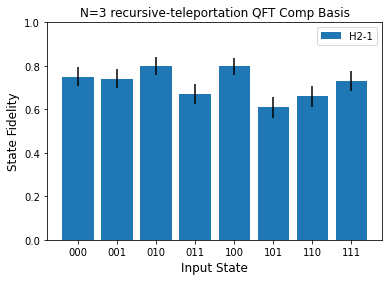

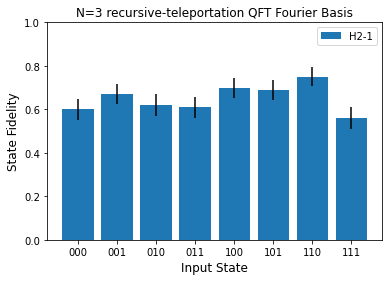

recursive-teleportation, comp basis: 0.72 +/- 0.016
recursive-teleportation, four basis: 0.65 +/- 0.017
recursive-teleportation, F_avg_lo: 0.44 +/- 0.02


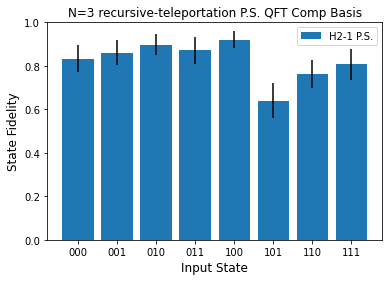

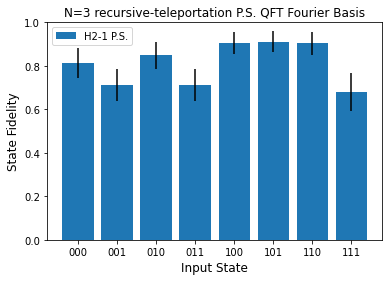

recursive-teleportation P.S., comp basis: 0.824 +/- 0.022
recursive-teleportation P.S., four basis: 0.81 +/- 0.023
recursive-teleportation P.S., F_avg_lo: 0.675 +/- 0.028


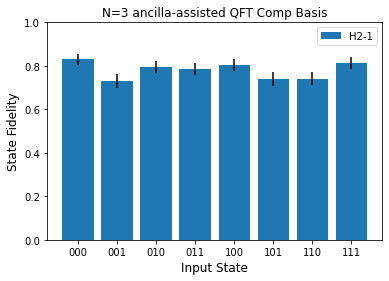

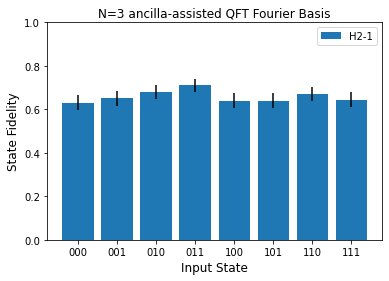

ancilla-assisted, comp basis: 0.78 +/- 0.01
ancilla-assisted, four basis: 0.658 +/- 0.012
ancilla-assisted, F_avg_lo: 0.5 +/- 0.014


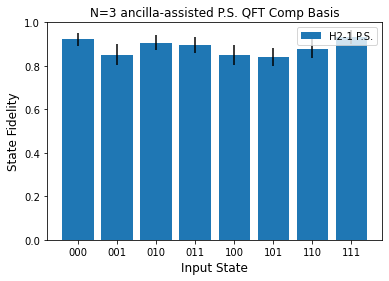

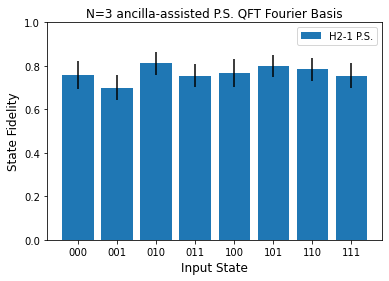

ancilla-assisted P.S., comp basis: 0.885 +/- 0.014
ancilla-assisted P.S., four basis: 0.766 +/- 0.02
ancilla-assisted P.S., F_avg_lo: 0.69 +/- 0.022


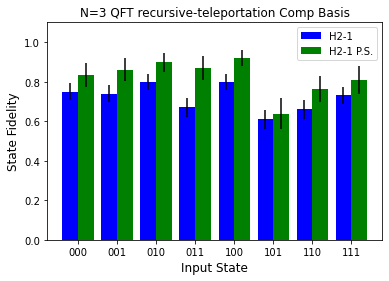

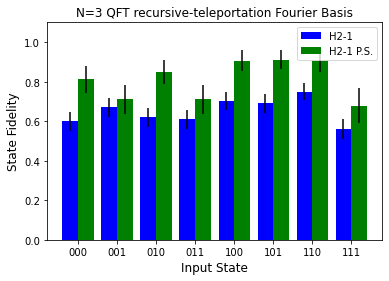

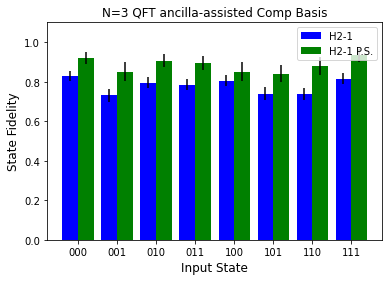

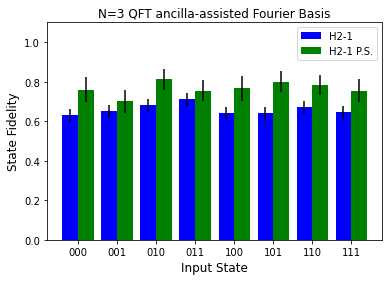

In [7]:
QFT_results1 = load_data('QFT_recursive_teleportation_data.json')
QFT_results2 = load_data('QFT_ancilla_assisted1_data.json')
QFT_results3 = load_data('QFT_ancilla_assisted2_data.json')


QFT_data1 = analyze_QFT_results(QFT_results1, method='recursive-teleportation')
QFT_data2 = analyze_QFT_results(QFT_results2, method='ancilla-assisted')
QFT_data3 = analyze_QFT_results(QFT_results3, method='ancilla-assisted')

QFT_data1_ps = analyze_QFT_results(QFT_results1, method='recursive-teleportation', postselect=True)
QFT_data2_ps = analyze_QFT_results(QFT_results2, method='ancilla-assisted', postselect=True)
QFT_data3_ps = analyze_QFT_results(QFT_results3, method='ancilla-assisted', postselect=True)

# combine the 2 ancilla-assisted experiments 
QFT_data_combined = {'comp':{'succ':{}, 'stds':{}}, 'fourier':{'succ':{}, 'stds':{}}}
QFT_data_combined_ps = {'comp':{'succ':{}, 'stds':{}}, 'fourier':{'succ':{}, 'stds':{}}}
for state in ['000', '001', '010', '011', '100', '101', '110', '111']:
    for basis in ['comp', 'fourier']:
    
        QFT_data_combined[basis]['succ'][state] = np.mean([QFT_data2[basis]['succ'][state], QFT_data3[basis]['succ'][state]])
        std1 = QFT_data2[basis]['stds'][state]
        std2 = QFT_data3[basis]['stds'][state]
        QFT_data_combined[basis]['stds'][state] = np.sqrt(std1**2+std2**2)/2

        QFT_data_combined_ps[basis]['succ'][state] = np.mean([QFT_data2_ps[basis]['succ'][state], QFT_data3_ps[basis]['succ'][state]])
        std1_ps = QFT_data2_ps[basis]['stds'][state]
        std2_ps = QFT_data3_ps[basis]['stds'][state]
        QFT_data_combined_ps[basis]['stds'][state] = np.sqrt(std1_ps**2+std2_ps**2)/2
        
        
# plot results

plot_QFT_data(QFT_data1, machine='H2-1', method='recursive-teleportation')
plot_QFT_data(QFT_data1_ps, machine='H2-1 P.S.', method='recursive-teleportation P.S.')
plot_QFT_data(QFT_data_combined, machine='H2-1', method='ancilla-assisted')
plot_QFT_data(QFT_data_combined_ps, machine='H2-1 P.S.', method='ancilla-assisted P.S.')

plot_QFT_comparison_data(QFT_data1, QFT_data1_ps, labels=['H2-1','H2-1 P.S.'], method='recursive-teleportation', save=False)
plot_QFT_comparison_data(QFT_data_combined, QFT_data_combined_ps, labels=['H2-1', 'H2-1 P.S.'], method='ancilla-assisted', save=False)

### Load, analyze, and plot logical control-T data

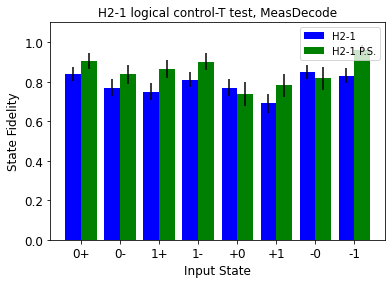

H2-1
XZ basis average fidelity: 0.785 +/- 0.02
ZX basis average fidelity: 0.792 +/- 0.02
Avg. Fidelity lower bound: 0.662 +/- 0.023
H2-1 P.S.
XZ basis average fidelity: 0.823 +/- 0.025
ZX basis average fidelity: 0.877 +/- 0.024
Avg. Fidelity lower bound: 0.76 +/- 0.028


In [6]:
CT_results = load_data('control_T_data.json')

CT_data = analyze_CT_results(CT_results)
CT_data_ps = analyze_CT_results(CT_results, postselect=True)

plot_CT_comparison_data(CT_data, CT_data_ps, machine=['H2-1', 'H2-1 P.S.'],save=False)